In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import csv

def randomSolution(weights):
    indices = list(range(len(weights)))  # Get a list of indices
    solution = []
    
    for _ in range(len(weights)):
        randIndex = random.choice(indices)  # Generate a random index from the problem space
        solution.append(randIndex)  
        indices.remove(randIndex)  # Remove the appended index so it is not used on the next iteration
    
    return solution

In [2]:
def knapsackValue(weights, values, solution):
    #calculate the total weight and total value of a knapsack solution
    totalWeight = 0
    totalValue = 0
    
    # Iterate over the solution and accumulate the total weight and total value
    for index in solution:
        totalWeight += weights[index]
        totalValue += values[index]
    
    return totalWeight, totalValue

#Generates a list of neighboring solutions by swapping items in the current solution.
def getNeighbours(solution):
    neighbours = []
    # Generate neighbors by swapping items at different indices
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbour = solution.copy()
            neighbour[i] = solution[j]
            neighbour[j] = solution[i]
            neighbours.append(neighbour)
    
    return neighbours



In [3]:
#Determine the best neighbor among the given list of neighboring solutions.
def getBestNeighbour(weights, values, neighbours):
    bestValue = knapsackValue(weights, values, neighbours[0])[1]
    bestNeighbour = neighbours[0]
    
    # Iterate over the neighbors and find the one with the highest value
    for neighbour in neighbours:
        currentWeight, currentValue = knapsackValue(weights, values, neighbour)
        
        if currentValue > bestValue:
            bestValue = currentValue
            bestNeighbour = neighbour
    
    return bestNeighbour, bestValue

In [4]:
#performs the hill climbing algorithm to find the best solution
def hillClimbing(weights, values):
    currentSolution = randomSolution(weights)
    currentWeight, currentBestValue = knapsackValue(weights, values, currentSolution)
    
    #print initial solution - this is a check to ensure a random solution is generated
    print("Initial Solution:")
    print(currentSolution)
    print()
    
    bestSolution = currentSolution
    bestWeight = currentWeight
    bestValue = currentBestValue
    
    neighbours = getNeighbours(currentSolution)
    bestNeighbour, bestNeighbourValue = getBestNeighbour(weights, values, neighbours)
    
    iterations_without_improvement = 0
    
    while bestNeighbourValue > currentBestValue:
        currentSolution = bestNeighbour
        currentWeight, currentBestValue = knapsackValue(weights, values, currentSolution)
        
        if currentBestValue > bestValue:
            bestSolution = bestNeighbour
            bestWeight = currentWeight
            bestValue = currentBestValue
            iterations_without_improvement = 0
        else:
            iterations_without_improvement += 1
        
        if iterations_without_improvement >= 45:
            break
        
        neighbours = getNeighbours(currentSolution)
        bestNeighbour, bestNeighbourValue = getBestNeighbour(weights, values, neighbours)
    
    return bestSolution, bestWeight, bestValue

Initial Solution:
Iteration: 0
Current Solution: [7, 36, 89, 4, 90, 10, 51, 20, 55, 45, 49, 81, 62, 46, 79, 33, 98, 93, 29, 28, 3, 17, 60, 52, 71, 26, 99, 80, 44, 1, 88, 54, 77, 12, 95, 40, 96, 50, 83, 14, 58, 66, 30, 5, 41, 70, 92, 67, 53, 11, 91, 64, 78, 75, 87, 85, 27, 94, 59, 63, 23, 57, 97, 74, 24, 18, 38, 42, 15, 21, 56, 0, 25, 31, 73, 9, 43, 16, 19, 2, 8, 61, 13, 68, 82, 69, 86, 6, 76, 84, 39, 48, 32, 35, 47, 65, 72, 37, 34, 22]
Current Objective Value: 5229
Best Objective Value: 5229

Iteration: 1
Current Objective Value: 5229
Best Objective Value: 5229

Iteration: 2
Current Objective Value: 5229
Best Objective Value: 5229

Iteration: 3
Current Objective Value: 5229
Best Objective Value: 5229

Iteration: 4
Current Objective Value: 5229
Best Objective Value: 5229

Iteration: 5
Current Objective Value: 5229
Best Objective Value: 5229

Iteration: 6
Current Objective Value: 5229
Best Objective Value: 5229

Iteration: 7
Current Objective Value: 5229
Best Objective Value: 5229

Itera

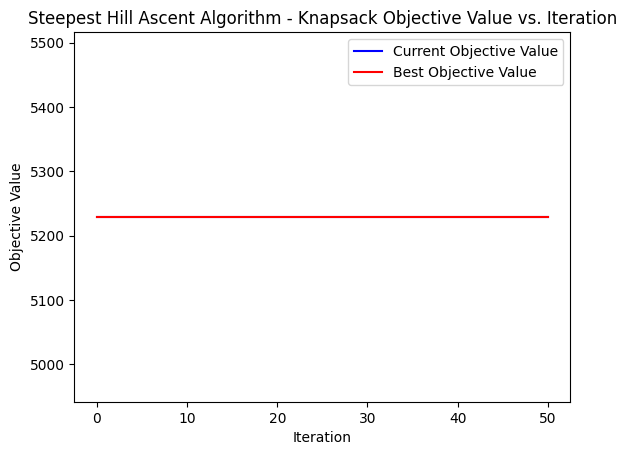

In [5]:
def main():
    weights = []
    values = []
    num_iterations = 50

    # Read data from CSV file
    with open("knapsack.csv", "r") as f:
        reader = csv.reader(f)
        next(reader)  # Skip the header row

        for row in reader:
            weights.append(int(row[0]))
            values.append(int(row[1]))

    # Initialize the current solution and best solution
    current_solution = randomSolution(weights)
    best_solution = current_solution

    # Initialize the current objective value and best objective value
    current_objective = knapsackValue(weights, values, current_solution)[1]
    best_objective = current_objective

    # Print initial solution and objective value
    print("Initial Solution:")
    print("Iteration: 0")
    print(f"Current Solution: {current_solution}")
    print(f"Current Objective Value: {current_objective}")
    print(f"Best Objective Value: {best_objective}")
    print()

    # Initialize lists to store objective values and best solution at each iteration
    objective_values = [current_objective]
    best_objectives = [best_objective]

    # Run hill climbing algorithm
    for iteration in range(1, num_iterations + 1):
        neighbours = getNeighbours(current_solution)
        best_neighbour, best_neighbour_objective = getBestNeighbour(weights, values, neighbours)

        # Update the current solution and objective value
        current_solution = best_neighbour
        current_objective = best_neighbour_objective

        # Update the best solution and objective value if a better solution is found
        if best_neighbour_objective > best_objective:
            best_solution = best_neighbour
            best_objective = best_neighbour_objective

        # Print current solution and objective value
        print(f"Iteration: {iteration}")
       # print(f"Current Solution: {current_solution}")
        print(f"Current Objective Value: {current_objective}")
        print(f"Best Objective Value: {best_objective}")
        print()

        # Store the objective value and best solution at each iteration
        objective_values.append(current_objective)
        best_objectives.append(best_objective)

    # Plot the objective value and best solution over iterations
    plt.plot(range(0, num_iterations + 1), objective_values, label="Current Objective Value", color='blue')
    plt.plot(range(0, num_iterations + 1), best_objectives, label="Best Objective Value", color='red')
    plt.xlabel("Iteration")
    plt.ylabel("Objective Value")
    plt.title("Steepest Hill Ascent Algorithm - Knapsack Objective Value vs. Iteration")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()